<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Python_for_ML/stackoverflow_full.csv')

In [6]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [5]:
data.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


<ipython-input-7-577ee87489b7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

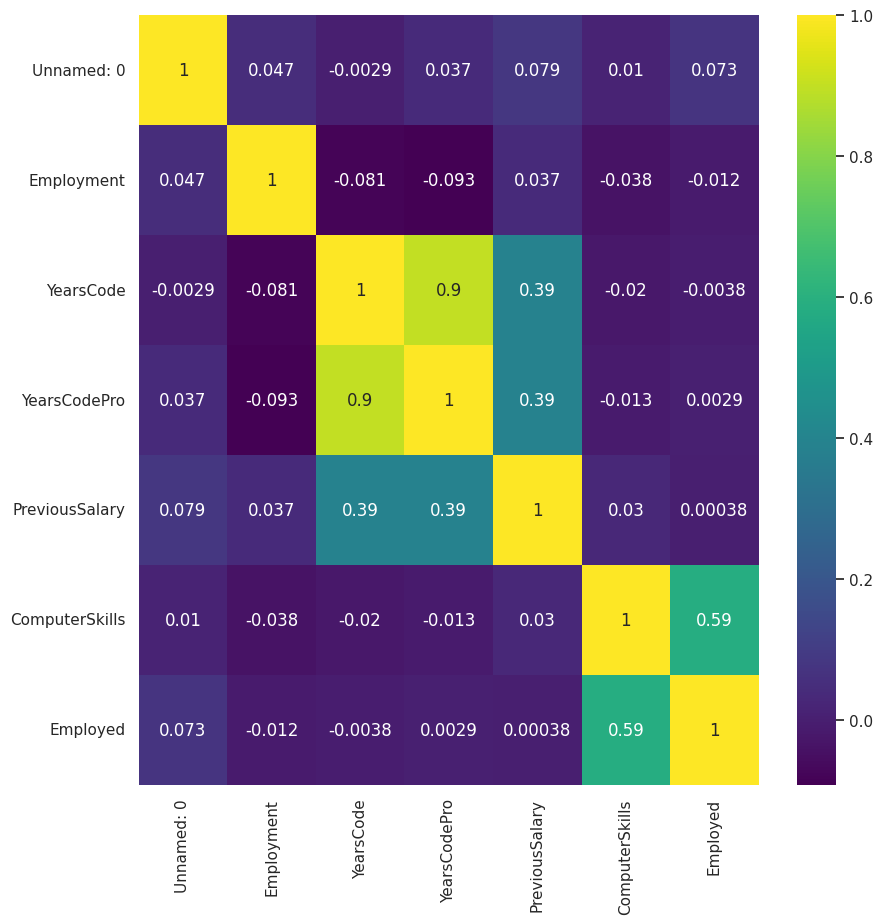

In [7]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
plt.figure(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, cmap='viridis', annot=True)

We will analyze impact on Mental Health due to data: YearsCodePro, EdLevel, MentalHealth, PreviousSalary and Gender

In [ ]:
from sklearn.model_selection import train_test_split

YCP_low = data['YearsCodePro'].quantile(0.01) # get 1st percentile
YCP_hi = data['YearsCodePro'].quantile(0.99) # get 99th percentile
PS_low = data['PreviousSalary'].quantile(0.01) # get 1st percentile
PS_hi = data['PreviousSalary'].quantile(0.99) # get 99th percentile
data_filtered = data[(data['PreviousSalary'] >PS_low) & (data['PreviousSalary']) <PS_high]
data_filtered = data[(data['YearsCodePro'] >YCP_low) & (data['YearsCodePro']) <YCP_hi]

X = data_filtered.drop(['Heart Rate','Dream Weight'], axis = 1)
y = data_filtered['Heart Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train.head()